In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['font.size'] = 15

In [2]:
data=pd.read_csv("garments_worker_productivity.csv")

In [3]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
data.select_dtypes(include=np.number).columns, data.select_dtypes(include=np.object_).columns

(Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
        'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
        'actual_productivity'],
       dtype='object'),
 Index(['date', 'quarter', 'department', 'day'], dtype='object'))

In [5]:
len(data.columns)

15

# Data Ingeniering, Data Mining..
A little data ingeniering to fix problems and re-ordered data...

In [6]:
data["department"]=data["department"].str.replace(" ","")

## coding data...

In [7]:
data["Year"]=data["date"].str.split("/").str[2].astype(np.int64)
data["Month"]=data["date"].str.split("/").str[0].astype(np.int64)
dict1={"Quarter1":1,"Quarter2":2,"Quarter3":3,"Quarter4":4,"Quarter5":5}
dict2={"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}
dict3={'sweing':1, 'finishing':2}
data["Day"]=data["day"].map(dict2)
data["Quarter"]=data["quarter"].map(dict1)
data["Department"]=data["department"].map(dict3)

In [8]:
data["Year"].value_counts()

2015    1197
Name: Year, dtype: int64

## get dummies...

In [9]:
data = pd.get_dummies(data, columns = ['quarter', 'department', 'day']) 

In [10]:
data.head()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1/1/2015,8,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1/1/2015,1,0.75,3.94,NaN,960,0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1/1/2015,11,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1/1/2015,12,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1/1/2015,6,0.80,25.90,1170.0,1920,50,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [11]:
#data=data.select_dtypes(include=np.number)
print(len(data.columns))

30


In [12]:
# Printing Null values or missing data values
print("Missing data for variable wip is",round(data["wip"].isnull().sum()/len(data)*100,2),"percent!")
pd.DataFrame(data.isnull().sum()).T

Missing data for variable wip is 42.27 percent!


,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0,0,0,0,506,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
del data["date"]
data.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'Year', 'Month', 'Day', 'Quarter', 'Department',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [14]:
data_s1=data[['Month','Day','Quarter','Department','team','targeted_productivity','smv','wip','over_time',
             'incentive','idle_time','idle_men','no_of_style_change','no_of_workers','actual_productivity']]
data_s2=data[['Month','quarter_Quarter1','quarter_Quarter2','quarter_Quarter3','quarter_Quarter4','quarter_Quarter5',
              'department_finishing','department_sweing','day_Monday','day_Saturday','day_Sunday','day_Thursday',
              'day_Tuesday','day_Wednesday','team','targeted_productivity','smv','wip','over_time','incentive','idle_time',
              'idle_men','no_of_style_change','no_of_workers','actual_productivity']]
data3=data_s2.dropna()

In [15]:
data_s1.head()

,Month,Day,Quarter,Department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,4,1,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,4,1,2,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1,4,1,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1,4,1,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1,4,1,1,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [16]:
data_s2.head()

,Month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,...,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,1,0,0,0,0,0,1,0,0,...,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,1,0,0,0,0,1,0,0,0,...,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1,1,0,0,0,0,0,1,0,0,...,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1,1,0,0,0,0,0,1,0,0,...,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1,1,0,0,0,0,0,1,0,0,...,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [17]:
data3.head()

,Month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,...,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,1,0,0,0,0,0,1,0,0,...,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1,1,0,0,0,0,0,1,0,0,...,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1,1,0,0,0,0,0,1,0,0,...,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1,1,0,0,0,0,0,1,0,0,...,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1,1,0,0,0,0,0,1,0,0,...,0.8,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125


# Doing imputation process...

In [18]:
# Creating a function to get imputation over variables
def impute_nan_meanmedian(df, variable, value, rnd=1):
    if value=="median":
        val=df[variable].median()
    if value=="mean":
        val=df[variable].mean()
    df[variable+"_"+value]=df[variable].fillna(val)
    df[variable+"_"+value]=df[variable+"_"+value].round(rnd)
    return df
import random
def rand_float_range(start, end):
    return random.random() * (end - start) + start

def impute_nan_random(df, variable, value=-9, rnd=1):
    if value!=-9:
        df[variable+"_random_fixed"]=df[variable].fillna(value)
        df[variable+"_random_fixed"]=df[variable+"_random_fixed"].round(rnd)
    else:
        start,end=df[variable].min(),df[variable].max()
        df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
        df[variable+"_random"]=df[variable+"_random"].round(1)
    return df

In [19]:
from sklearn.impute import KNNImputer
#datanew = data.select_dtypes(include=np.number)
def imputer_knn(df,neig=30):
    df0=df.copy()
    # define imputer
    imputer = KNNImputer(n_neighbors=neig, weights='distance', metric='nan_euclidean',add_indicator=False)
    # fit on the dataset
    imputer.fit(df0)
    # transform the dataset
    Xtrans = imputer.transform(df0)
    Xtrans=pd.DataFrame(Xtrans,columns=df0.columns)
    df0["wip_knn"]=Xtrans["wip"].round()
    return df0

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import mean_squared_error
def make_imputation(df):
    df0=df.copy()
    # Mean Imputation
    mean_imputer = SimpleImputer(strategy='mean')
    mean_imputed = mean_imputer.fit_transform(np.array(df0["wip"]).reshape(-1, 1))
    df0["wip_mean"]=np.round(mean_imputed)

    # Median Imputation
    mean_imputer = SimpleImputer(strategy='median')
    mean_imputed = mean_imputer.fit_transform(np.array(df0["wip"]).reshape(-1, 1))
    df0["wip_median"]=np.round(mean_imputed)

    return df0

In [21]:
data_s1_imp_mm=make_imputation(data_s1)
data_s1_imp_knn=imputer_knn(data_s1)

In [22]:
data_s2_imp_mm=make_imputation(data_s2)
data_s2_imp_knn=imputer_knn(data_s2)

In [23]:
data_s2_imp_knn.head()

,Month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,...,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,wip_knn
0,1,1,0,0,0,0,0,1,0,0,...,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1108.0
1,1,1,0,0,0,0,1,0,0,0,...,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,818.0
2,1,1,0,0,0,0,0,1,0,0,...,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,968.0
3,1,1,0,0,0,0,0,1,0,0,...,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,968.0
4,1,1,0,0,0,0,0,1,0,0,...,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1170.0


In [24]:
data_s1_imp_knn.head()

,Month,Day,Quarter,Department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,wip_knn
0,1,4,1,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1108.0
1,1,4,1,2,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,818.0
2,1,4,1,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,968.0
3,1,4,1,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,968.0
4,1,4,1,1,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1170.0


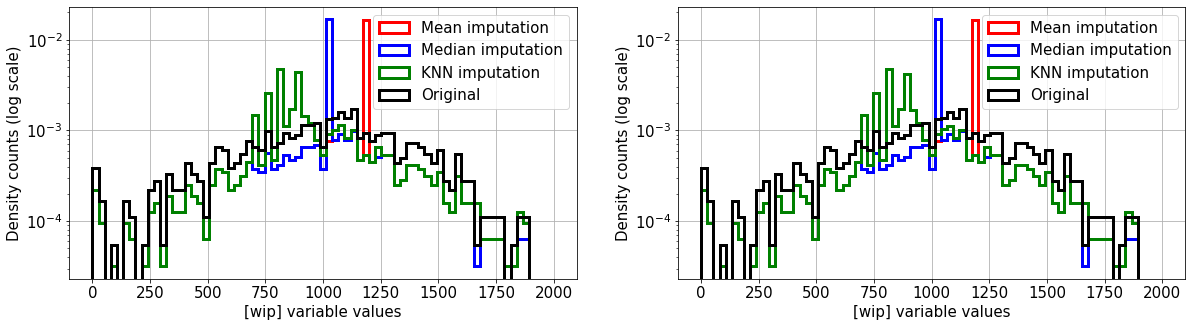

In [25]:
plt.figure(figsize=(20,5))
b=75
plt.subplot(121)
r1=[0,2000]
plt.hist(data_s1_imp_mm["wip_mean"],bins=b,density=True,cumulative=False,range=r1,label="Mean imputation",histtype="step",lw=3,color='r')
plt.hist(data_s1_imp_mm["wip_median"],bins=b,density=True,cumulative=False,range=r1,label="Median imputation",histtype="step",lw=3,color='b')
plt.hist(data_s1_imp_knn["wip_knn"],bins=b,density=True,cumulative=False,range=r1,label="KNN imputation",histtype="step",lw=3,color='g')
plt.hist(data_s1["wip"],bins=b,density=True,cumulative=False,range=r1,label="Original",histtype="step",lw=3,color='k')
plt.legend()
plt.grid()
plt.yscale("log")
#plt.xscale("log")
plt.ylabel("Density counts (log scale)")
plt.xlabel("[wip] variable values")
plt.subplot(122)
r2=[0,2000]
plt.hist(data_s2_imp_mm["wip_mean"],bins=b,density=True,cumulative=False,range=r1,label="Mean imputation",histtype="step",lw=3,color='r')
plt.hist(data_s2_imp_mm["wip_median"],bins=b,density=True,cumulative=False,range=r1,label="Median imputation",histtype="step",lw=3,color='b')
plt.hist(data_s2_imp_knn["wip_knn"],bins=b,density=True,cumulative=False,range=r1,label="KNN imputation",histtype="step",lw=3,color='g')
plt.hist(data_s2["wip"],bins=b,density=True,cumulative=False,range=r1,label="Original",histtype="step",lw=3,color='k')
plt.legend()
plt.grid()
plt.yscale("log")
#plt.xscale("log")
plt.ylabel("Density counts (log scale)")
plt.xlabel("[wip] variable values")
plt.show()

A last imputation using RandomForestRegressor(classifier)

In [26]:
#Regressors:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge, GammaRegressor, HuberRegressor, PoissonRegressor, Ridge, TheilSenRegressor, TweedieRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [27]:
imp_RF_s1 = IterativeImputer(estimator=RandomForestRegressor(),verbose=1,add_indicator=False)
imp_RF_s2 = IterativeImputer(estimator=RandomForestRegressor(),verbose=1,add_indicator=False)
imp_RF_s1.fit(data_s1)
data_s1_imp_rf=pd.DataFrame(imp_RF_s1.transform(data_s1),columns=data_s1.columns)
imp_RF_s2.fit(data_s2)
data_s2_imp_rf=pd.DataFrame(imp_RF_s2.transform(data_s2),columns=data_s2.columns)

[IterativeImputer] Completing matrix with shape (1197, 15)
[IterativeImputer] Change: 9803.104008683067, scaled tolerance: 25.92 
[IterativeImputer] Change: 1802.58, scaled tolerance: 25.92 
[IterativeImputer] Change: 3422.1400000000012, scaled tolerance: 25.92 
[IterativeImputer] Change: 3303.040000000001, scaled tolerance: 25.92 
[IterativeImputer] Change: 2333.4500000000007, scaled tolerance: 25.92 
[IterativeImputer] Change: 1480.2399999999998, scaled tolerance: 25.92 
[IterativeImputer] Change: 2366.7000000000007, scaled tolerance: 25.92 
[IterativeImputer] Change: 3144.869999999999, scaled tolerance: 25.92 
[IterativeImputer] Change: 3634.9299999999985, scaled tolerance: 25.92 
[IterativeImputer] Change: 1981.369999999999, scaled tolerance: 25.92 
[IterativeImputer] Completing matrix with shape (1197, 15)
[IterativeImputer] Completing matrix with shape (1197, 25)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 10527.314008683068, scaled tolerance: 25.92 
[IterativeImputer] Change: 2444.11, scaled tolerance: 25.92 
[IterativeImputer] Change: 1480.75, scaled tolerance: 25.92 
[IterativeImputer] Change: 1622.5299999999997, scaled tolerance: 25.92 
[IterativeImputer] Change: 2607.95, scaled tolerance: 25.92 
[IterativeImputer] Change: 1885.83, scaled tolerance: 25.92 
[IterativeImputer] Change: 2424.5700000000015, scaled tolerance: 25.92 
[IterativeImputer] Change: 2094.2000000000007, scaled tolerance: 25.92 
[IterativeImputer] Change: 3464.120000000001, scaled tolerance: 25.92 
[IterativeImputer] Change: 4009.3500000000004, scaled tolerance: 25.92 
[IterativeImputer] Completing matrix with shape (1197, 25)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [28]:
data_s1["wip_mean"],data_s1["wip_median"]=data_s1_imp_mm["wip_mean"],data_s1_imp_mm["wip_median"]
data_s1["wip_knn"],data_s1["wip_rf"]=data_s1_imp_knn["wip_knn"],data_s1_imp_rf["wip"].round()
data_s2["wip_mean"],data_s2["wip_median"]=data_s2_imp_mm["wip_mean"],data_s2_imp_mm["wip_median"]
data_s2["wip_knn"],data_s2["wip_rf"]=data_s2_imp_knn["wip_knn"],data_s2_imp_rf["wip"].round()

/tmp/ipykernel_60091/1954888600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s1["wip_mean"],data_s1["wip_median"]=data_s1_imp_mm["wip_mean"],data_s1_imp_mm["wip_median"]
/tmp/ipykernel_60091/1954888600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s1["wip_mean"],data_s1["wip_median"]=data_s1_imp_mm["wip_mean"],data_s1_imp_mm["wip_median"]
/tmp/ipykernel_60091/1954888600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [29]:
data_s2

,Month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,...,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,wip_mean,wip_median,wip_knn,wip_rf
0,1,1,0,0,0,0,0,1,0,0,...,98,0.0,0,0,59.0,0.940725,1108.0,1108.0,1108.0,1108.0
1,1,1,0,0,0,0,1,0,0,0,...,0,0.0,0,0,8.0,0.886500,1190.0,1039.0,818.0,713.0
2,1,1,0,0,0,0,0,1,0,0,...,50,0.0,0,0,30.5,0.800570,968.0,968.0,968.0,968.0
3,1,1,0,0,0,0,0,1,0,0,...,50,0.0,0,0,30.5,0.800570,968.0,968.0,968.0,968.0
4,1,1,0,0,0,0,0,1,0,0,...,50,0.0,0,0,56.0,0.800382,1170.0,1170.0,1170.0,1170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3,0,1,0,0,0,1,0,0,0,...,0,0.0,0,0,8.0,0.628333,1190.0,1039.0,818.0,566.0
1193,3,0,1,0,0,0,1,0,0,0,...,0,0.0,0,0,8.0,0.625625,1190.0,1039.0,818.0,566.0
1194,3,0,1,0,0,0,1,0,0,0,...,0,0.0,0,0,8.0,0.625625,1190.0,1039.0,818.0,568.0
1195,3,0,1,0,0,0,1,0,0,0,...,0,0.0,0,0,15.0,0.505889,1190.0,1039.0,709.0,560.0


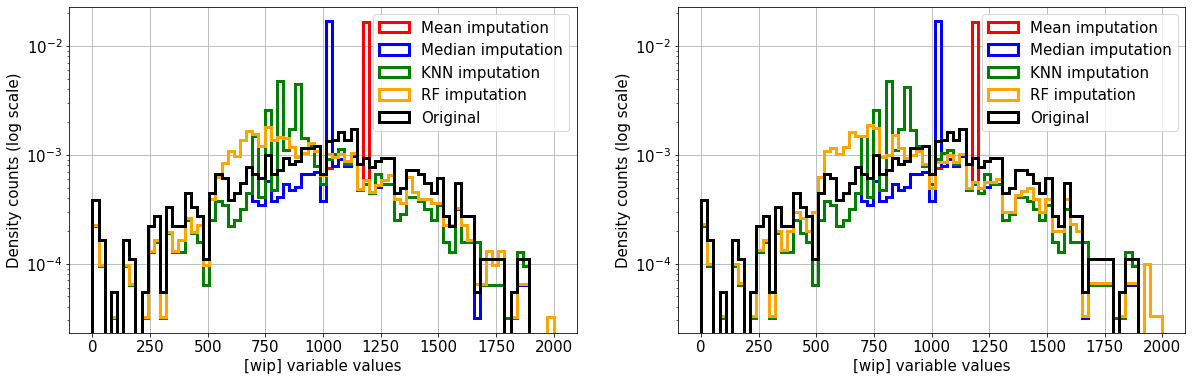

In [30]:
plt.figure(figsize=(20,6))
b=75
plt.subplot(121)
r1=[0,2000]
plt.hist(data_s1["wip_mean"],bins=b,density=True,cumulative=False,range=r1,label="Mean imputation",histtype="step",lw=3,color='r')
plt.hist(data_s1["wip_median"],bins=b,density=True,cumulative=False,range=r1,label="Median imputation",histtype="step",lw=3,color='b')
plt.hist(data_s1["wip_knn"],bins=b,density=True,cumulative=False,range=r1,label="KNN imputation",histtype="step",lw=3,color='g')
plt.hist(data_s1["wip_rf"],bins=b,density=True,cumulative=False,range=r1,label="RF imputation",histtype="step",lw=3,color='orange')
plt.hist(data_s1["wip"],bins=b,density=True,cumulative=False,range=r1,label="Original",histtype="step",lw=3,color='k')
plt.legend()
plt.grid()
plt.yscale("log")
#plt.xscale("log")
plt.ylabel("Density counts (log scale)")
plt.xlabel("[wip] variable values")
plt.subplot(122)
r2=[0,2000]
plt.hist(data_s2["wip_mean"],bins=b,density=True,cumulative=False,range=r1,label="Mean imputation",histtype="step",lw=3,color='r')
plt.hist(data_s2["wip_median"],bins=b,density=True,cumulative=False,range=r1,label="Median imputation",histtype="step",lw=3,color='b')
plt.hist(data_s2["wip_knn"],bins=b,density=True,cumulative=False,range=r1,label="KNN imputation",histtype="step",lw=3,color='g')
plt.hist(data_s2["wip_rf"],bins=b,density=True,cumulative=False,range=r1,label="RF imputation",histtype="step",lw=3,color='orange')
plt.hist(data_s2["wip"],bins=b,density=True,cumulative=False,range=r1,label="Original",histtype="step",lw=3,color='k')
plt.legend()
plt.grid()
plt.yscale("log")
#plt.xscale("log")
plt.ylabel("Density counts (log scale)")
plt.xlabel("[wip] variable values")
plt.savefig("imputation_fig.pdf",bbox_inches='tight',dpi=300)
plt.show()

In [31]:
data_s1.to_csv("garments_worker_productivity_s1.csv",index=False)
data_s2.to_csv("garments_worker_productivity_s2.csv",index=False)